<a href="https://colab.research.google.com/github/Debapriya2892/Test_Repository/blob/main/EDA_TITANIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Problem Statement : Classification model using Logistic Regression to predict Survived / Deceased***


**IMPORT LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**DATA READ**

In [ ]:
train = pd.read_csv ("/content/titanic_data.csv")

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**EXPLORATORY DATA ANALYSIS**

In [ ]:
# missing values ???

train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


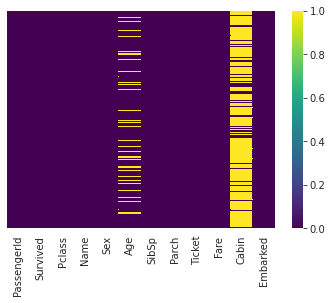

In [ ]:
sns.heatmap(train.isnull(),  yticklabels= False, cmap='viridis')

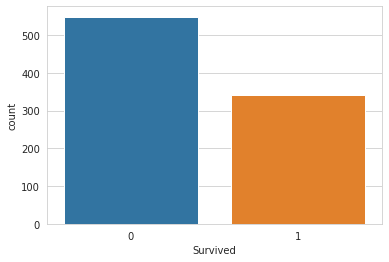

In [ ]:
#sns.set_style ('whitegrid')
sns.countplot(x='Survived' , data=train)

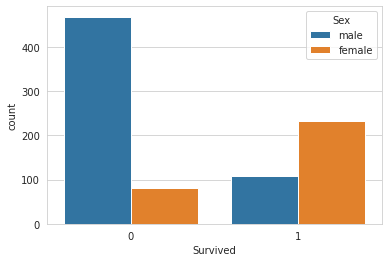

In [ ]:
sns.countplot( x= 'Survived' , hue ='Sex' , data = train)

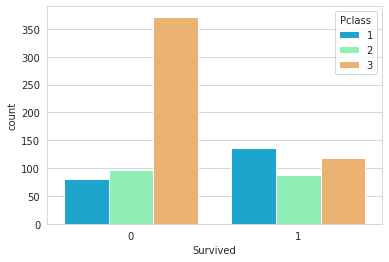

In [ ]:
sns.countplot( x= 'Survived' , hue ='Pclass' , data = train, palette = 'rainbow')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


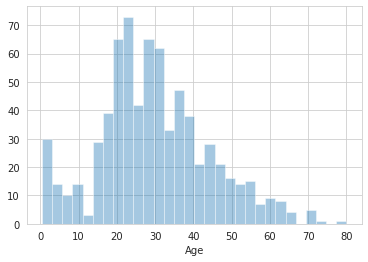

In [ ]:
# Using seaborn
sns.distplot(train['Age'].dropna(), kde= False , bins= 30)

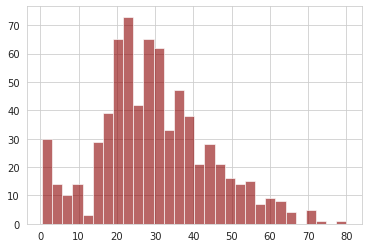

In [ ]:
# Using matplotlib
train['Age'].hist(bins=30, color= 'darkred', alpha=0.6)

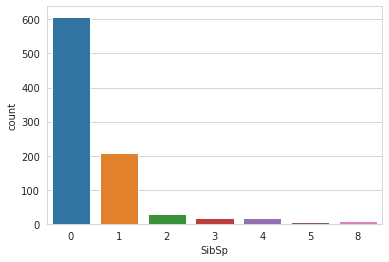

In [ ]:
sns.countplot( x= 'SibSp', data=train)

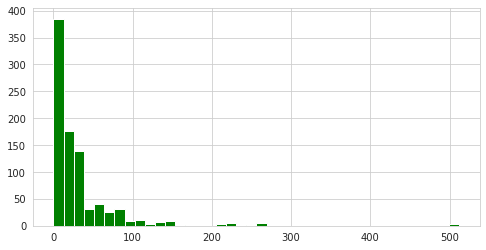

In [ ]:
train['Fare'].hist(color= 'green', bins=40, figsize=(8,4))

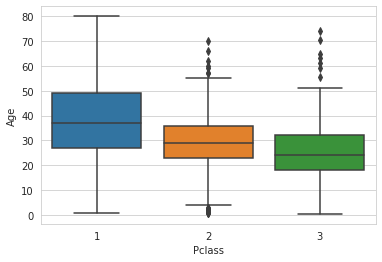

In [ ]:
# Data Cleaning
# Replacing NaN values of Age column with mean

sns.boxplot(x= 'Pclass' , y= 'Age', data = train)

In [ ]:
def manipulate_age(cols):
  Age= cols[0]
  Pclass= cols[1]
  if pd.isnull(Age):
    if Pclass== 1:
      return 37
    elif Pclass ==2:
      return 29
    else :
      return 24
  else:
    return Age



In [ ]:
train['Age'] = train[['Age' , 'Pclass']].apply(manipulate_age, axis =1)
# Dropping Cabin column
train.drop('Cabin', axis=1, inplace=True)

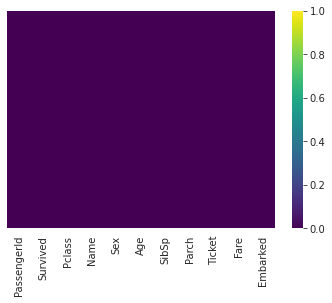

In [ ]:
sns.heatmap(train.isnull(),  yticklabels= False, cmap='viridis')

In [ ]:
# Converting Categorical Features
pd.get_dummies(train['Embarked'], drop_first=True )

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [ ]:
pd.get_dummies(train['Sex'] ,drop_first=True)

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [ ]:
embark=pd.get_dummies(train['Embarked'], drop_first=True )
sex=pd.get_dummies(train['Sex'] ,drop_first=True)



In [ ]:
train.drop(['Embarked', 'Sex', 'Name', 'Ticket' ] , axis=1 , inplace= True)

In [ ]:
train.head(10)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
5,6,0,3,24.0,0,0,8.4583
6,7,0,1,54.0,0,0,51.8625
7,8,0,3,2.0,3,1,21.0750
8,9,1,3,27.0,0,2,11.1333
9,10,1,2,14.0,1,0,30.0708


In [ ]:
train= pd.concat([train,sex,embark],axis=1)

In [ ]:
train.head(10)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
5,6,0,3,24.0,0,0,8.4583,1,1,0
6,7,0,1,54.0,0,0,51.8625,1,0,1
7,8,0,3,2.0,3,1,21.0750,1,0,1
8,9,1,3,27.0,0,2,11.1333,0,0,1
9,10,1,2,14.0,1,0,30.0708,0,0,0


**BUILDING LOGISTIC REGRESSION MODEL**

In [ ]:
train['Survived'].head(10)




0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    1
9    1
Name: Survived, dtype: int64

In [ ]:
# Dropping the dependent feature "Survived" and keeping rest of the independent features
train.drop(['Survived'], axis=1)
train.head()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(train.drop('Survived',axis=1), train['Survived'], test_size=0.30)

**TRAINING AND PREDICTING**

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
predictions = logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
accuracy= confusion_matrix(Y_test, predictions)
accuracy

array([[134,  26],
       [ 32,  76]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy =accuracy_score(Y_test,predictions)
accuracy

0.7835820895522388

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [ ]:
#predictions = logmodel.predict(4)